# Luca Corsetti 0001131095

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

random_state = 777

np.random.seed(random_state)

1. Load the data from the file and show: the
first few rows, the output of the
.describe() function, the number of rows
and columns (4pt)
2. Since the data contain nulls, eliminate the
rows with nulls
3. Since one of the predicting attributes is
ordinal, it must be converted into numeric,
you can use the OrdinalEncoder
4. Split the data into train and test
5. Use two classification models of your
choice (say: model 1 and model 2) execute
the tasks below
6. Model 1: find and show the best
hyperparameter setting with cross validation
on the training set, optimise for the best
accuracy
7. Model 1: show the accuracy of
classification and the confusion matrix on
the test set
For the confusion matrix use
plot_confusion_matrix normalized in order
to show for each class the precision (read
carefully the documentation)
8. Model 2: find and show the best
hyperparameter setting with cross validation
on the training set, optimise for the best
accuracy
9. Model 2: show the accuracy of
classification and the confusion matrix on
the test set
For the confusion matrix use
plot_confusion_matrix normalized in order
to show for each class the precision (read
carefully the documentation)

### 1. Load the data from the file and show: the first few rows, the output of the .describe() function, the number of rows and columns (4pt)

let's load the dataset provided and display it for inspection of the data

In [2]:
df = pd.read_csv('./exam_2021_01_27.csv', header=None)

df.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [3]:
df.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


### 2. Since the data contain nulls, eliminate the rows with nulls

let's clean the data by removing rows with partial data

In [4]:
df.dropna(inplace=True)

df.head()

,0,1,2,3,4
4,5.0,3.6,a,0.2,0
7,5.0,3.4,a,0.2,0
10,5.4,3.7,a,0.2,0
11,4.8,3.4,a,0.2,0
13,4.3,3.0,a,0.1,0


In [5]:
df.describe()

,0,1,3,4
count,122.000000,122.000000,122.000000,122.000000
mean,6.050000,2.985246,1.418852,1.229508
std,0.768088,0.433642,0.673136,0.736160
min,4.300000,2.000000,0.100000,0.000000
25%,5.500000,2.700000,1.100000,1.000000
50%,6.050000,3.000000,1.500000,1.000000
75%,6.500000,3.200000,1.900000,2.000000
max,7.900000,4.400000,2.500000,2.000000


### 3. Since one of the predicting attributes is ordinal, it must be converted into numeric, you can use the OrdinalEncoder

In [6]:
# Set the transformer data type
transf_dtype = np.int32
# Instantiate the encoder and perform `fit_transform`
encoder = OrdinalEncoder(dtype = transf_dtype)
transformed = encoder.fit_transform(df)

In [7]:
df = pd.DataFrame(transformed)

df.head()

,0,1,2,3,4
0,5,15,0,1,0
1,5,13,0,1,0
2,8,16,0,1,0
3,3,13,0,1,0
4,0,9,0,0,0


### 4. Split the data into train and test

since we do not have much data, we will keep as much as possible train data. we need firstly to split the data into the feature matrix and the labels class

In [8]:
target = 4

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

print(f"there are {X_train.shape[0]} training samples")
print(f"there are {X_test.shape[0]} training samples")

there are 91 training samples
there are 31 training samples


### 5. Use two classification models of your choice (say: model 1 and model 2) execute the tasks below

we will use:
- *DecisionTree* model
- *NaiveBayes* model

to perform the task. let's prepare a handy data structure that will be useful later given the requirements.

In [51]:
classifiers = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=random_state),
        'params': [{'max_depth': list(range(1, 20)), 'class_weight': ['balanced']}]
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': [{'var_smoothing': [10**exp for exp in range(-3, -13, -1)]}]
    }
}

scoring='accuracy' # both for requirement 6 & 8

### 6. Model 1: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy

we will look for the best accuracy model by using GridSearchCV, which will find for us the best model for the 'accuracy' metric

In [52]:
model = classifiers['DecisionTree']

gs = GridSearchCV(model['model'], param_grid=model['params'], cv=5, scoring=scoring)

gs.fit(X_train, y_train)

print(f"the best parameter found for the DecisionTree classifier was {gs.best_params_}")

the best parameter found for the DecisionTree classifier was {'class_weight': 'balanced', 'max_depth': 4}


### 7. Model 1: show the accuracy of classification and the confusion matrix on the test set.
For the confusion matrix use
plot_confusion_matrix normalized in order
to show for each class the precision (read
carefully the documentation)

the model performed with an accuracy of 90.32% over the test dataset


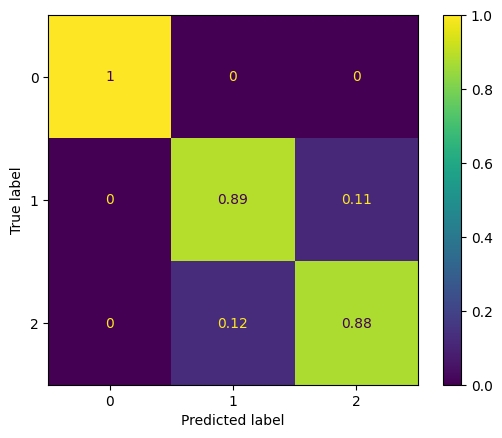

In [65]:
best_estimator1 = gs.best_estimator_

y_pred = best_estimator1.predict(X_test)

score = accuracy_score(y_test, y_pred)

print(f"the model performed with an accuracy of {score*100:.2f}% over the test dataset")

cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'))

cmd.plot()

### 8. Model 2: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy

let's repeat the process for the NaiveBayes classifier

In [66]:
model = classifiers['NaiveBayes']

gs = GridSearchCV(model['model'], param_grid=model['params'], cv=5, scoring=scoring)

gs.fit(X_train, y_train)

print(f"the best parameter found for the NaiveBayes classifier was {gs.best_params_}")

the best parameter found for the NaiveBayes classifier was {'var_smoothing': 0.001}


### 9. Model 2: show the accuracy of classification and the confusion matrix on the test set
For the confusion matrix use
plot_confusion_matrix normalized in order
to show for each class the precision (read
carefully the documentation)

the model performed with an accuracy of 96.77% over the test dataset


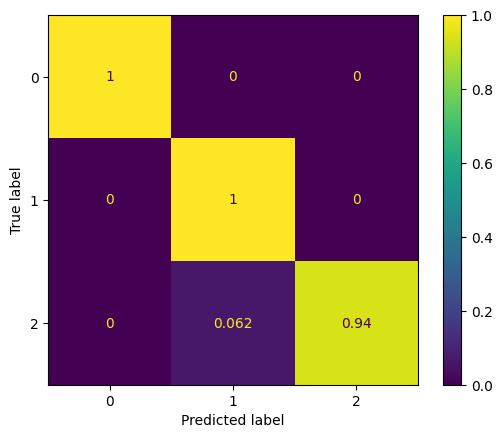

In [67]:
best_estimator = gs.best_estimator_

y_pred = best_estimator.predict(X_test)

score = accuracy_score(y_test, y_pred)

print(f"the model performed with an accuracy of {score*100:.2f}% over the test dataset")

cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'))

cmd.plot()

if we wanted to make a comparison, we could see that the NaiveBayes performed better than the DecisionTree for accuracy, scoring a **96.77%**